   Age  Income($)
0   27      70000
1   29      90000
2   29      61000
3   28      60000
4   42     150000


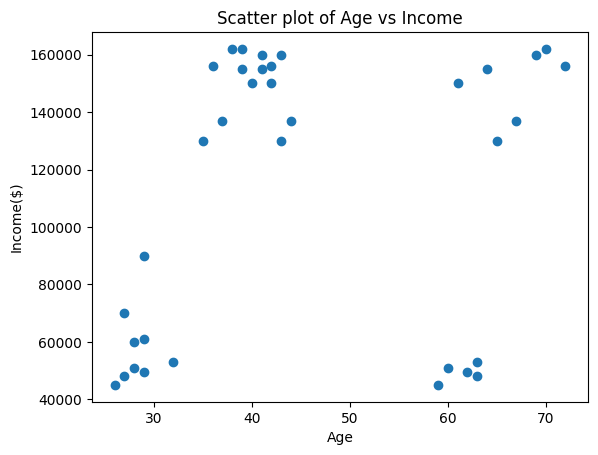

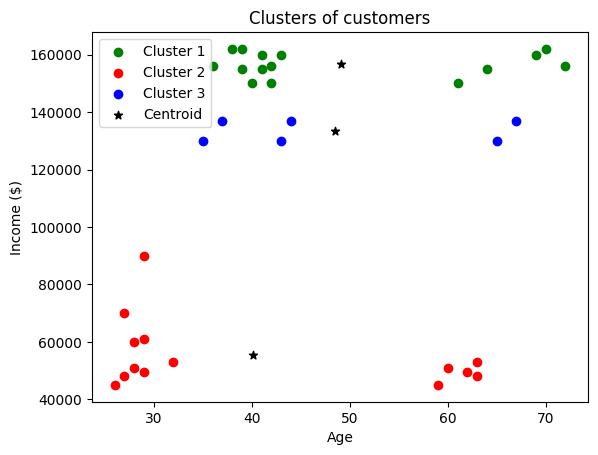

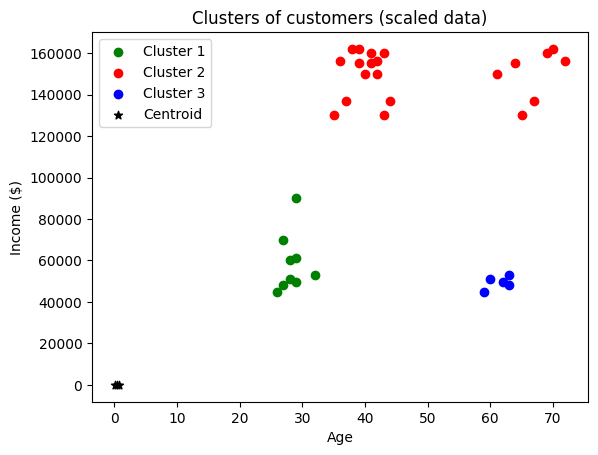

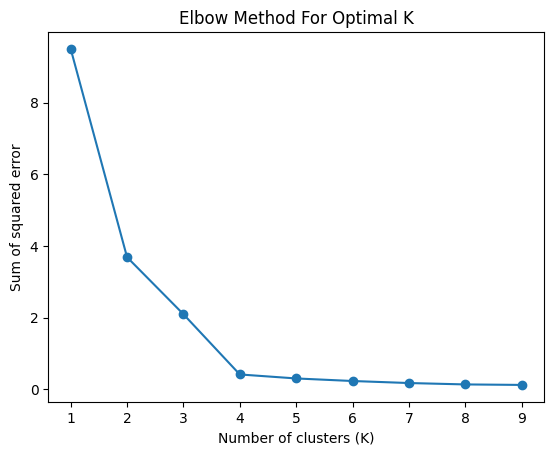

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("kmeans_data.csv")
print(df.head())

# Visualize the data
plt.scatter(df.Age, df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.title('Scatter plot of Age vs Income')
plt.show()

# Initialize KMeans model
km = KMeans(n_clusters=3)

# Fit and predict clusters
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
df['cluster'] = y_predicted

# Visualize clusters and centroids
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1.Age, df1['Income($)'], color='green', label='Cluster 1')
plt.scatter(df2.Age, df2['Income($)'], color='red', label='Cluster 2')
plt.scatter(df3.Age, df3['Income($)'], color='blue', label='Cluster 3')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='black', marker='*', label='Centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.title('Clusters of customers')
plt.legend()
plt.show()

# Scaling the data
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[['Age', 'Income($)']])
df_scaled = pd.DataFrame(df_scaled, columns=['Age', 'Income($)'])

# Re-fit KMeans on scaled data
km.fit(df_scaled[['Age', 'Income($)']])
df['cluster_scaled'] = km.predict(df_scaled[['Age', 'Income($)']])

# Visualize clusters after scaling
df1_scaled = df[df.cluster_scaled == 0]
df2_scaled = df[df.cluster_scaled == 1]
df3_scaled = df[df.cluster_scaled == 2]

plt.scatter(df1_scaled.Age, df1_scaled['Income($)'], color='green', label='Cluster 1')
plt.scatter(df2_scaled.Age, df2_scaled['Income($)'], color='red', label='Cluster 2')
plt.scatter(df3_scaled.Age, df3_scaled['Income($)'], color='blue', label='Cluster 3')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='black', marker='*', label='Centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.title('Clusters of customers (scaled data)')
plt.legend()
plt.show()

# Plotting elbow method (Sum of squared errors)
sse = []
k_range = range(1, 10)
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df_scaled[['Age', 'Income($)']])
    sse.append(km.inertia_)

plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Sum of squared error')
plt.title('Elbow Method For Optimal K')
plt.show()
